In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model



In [29]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [30]:
print(train.shape)

(1460, 81)


In [31]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)
print(train['SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [32]:
print(train['SalePrice'].skew())

1.8828757597682129


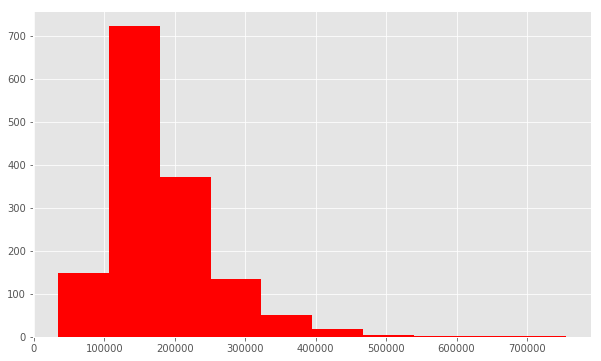

In [33]:
plt.hist(train['SalePrice'],color='red')
plt.show()

In [34]:
target = np.log(train['SalePrice'])
print(target.skew())

0.12133506220520406


In [35]:
numeric_features = train.select_dtypes(include =[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:5])
print(corr['SalePrice'].sort_values(ascending =False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


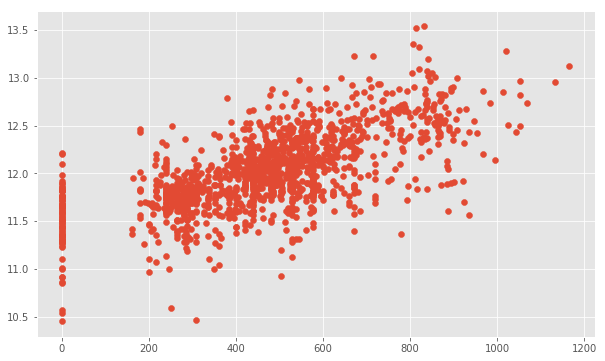

In [42]:
train = train[train['GarageArea'] < 1200]
plt.scatter(x=train['GarageArea'],y=np.log(train['SalePrice']))
plt.show()


In [46]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)


              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [47]:
categorical = train.select_dtypes(exclude =[np.number])
print(categorical.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq    

In [49]:
print(train['Street'].value_counts())

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [52]:
train['new_street']=pd.get_dummies(train['Street'],drop_first=True)
test['new_street']=pd.get_dummies(train['Street'],drop_first=True)
print(train['new_street'].value_counts())

1    1450
0       5
Name: new_street, dtype: int64


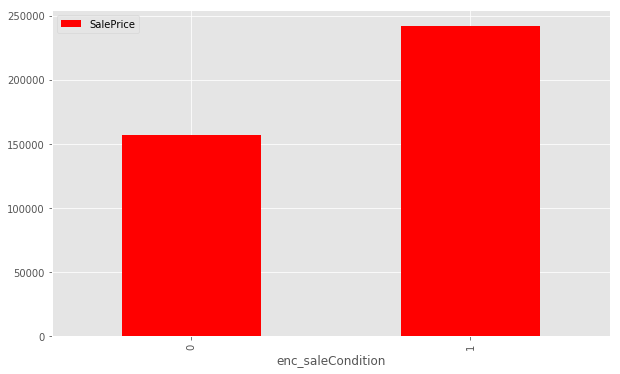

In [71]:
def encode(x): return 1 if x=='Partial' else 0
train['enc_saleCondition']= train['SaleCondition'].apply(encode)
test['enc_saleCondition'] = test['SaleCondition'].apply(encode)
condition_pivot = train.pivot_table(values ='SalePrice',index='enc_saleCondition',aggfunc = np.median)
condition_pivot.plot(kind='bar',color ='red')

#plt.show()


In [73]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(data.isnull().sum())

Id                   0
MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           0
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageYrBlt          0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
MoSold               0
YrSold               0
SalePrice            0
new_street           0
enc_saleCondition    0
dtype: int64


In [74]:
y = np.log(train['SalePrice'])
x = data.drop(['SalePrice','Id'],axis = 1)


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.33)

In [76]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
print(model.score(x_test,y_test))

0.8882477709262669


In [80]:
predictions = model.predict(x_test)
print(mean_squared_error(y_test,predictions))

0.01784179451956572


In [81]:
#for i in range(-2,3):
 #   alpha = 10**i;
  #  rm = linear_model.Ridge(alpha=alpha)
   # ridge_model = rm.fit(x_train,y_train)
    #ridge_pred = ridge_model.predict(x_test)
    

In [87]:
submission = pd.DataFrame()
submission['Id']=test['Id']
fe = test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()
new_predictions = model.predict(fe)
final_predictions = np.exp(new_predictions)
submission['SalePrice']=final_predictions
print(submission.head())


     Id      SalePrice
0  1461  128959.491726
1  1462  122920.740244
2  1463  175704.825981
3  1464  200050.832638
4  1465  182075.469864


In [88]:
submission.to_csv("submit.csv",index=False)